# WEEK 2 

## Data Exploration

### Cab_Data exploration

In [37]:
import pandas as pd
cab_data= pd.read_csv('Cab_Data.csv')
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], unit='D', origin='1899-12-30')
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### City Data Exploration 

In [38]:
city_data= pd.read_csv('City.csv')
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### Customer Data Exploration

In [39]:
customer_data= pd.read_csv('Customer_ID.csv')
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### Transaction Data Exploration

In [40]:
transaction_data= pd.read_csv('Transaction_ID.csv')
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


GET THE AVERAGE PROFIT AND AVERAGE PROFIT PER CITY AND COMAPNY
SEASONALITY IN PROFIT/ 

In [115]:
### Merging all 4 files
import pandas as pd

# Assuming you have four pandas DataFrames named 'cab_data', 'city_data', 'customer_data', and 'transaction_data'

# Merge cab_data and city_data based on the 'City' column
merged_data1 = pd.merge(cab_data, city_data, on='City')

# Merge merged_data and customer_data based on the 'Customer ID' column
merged_data = pd.merge(merged_data1, transaction_data, on='Transaction ID')

# Merge merged_data and transaction_data based on the 'Transaction ID' column
final_data = pd.merge(merged_data, customer_data, on='Customer ID')
final_data.head()



,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


## The hypothesis and vizualizations

### Hypothesis 1

#### Are there any seasonal patterns or trends in the number of customers 
#### using the cab service over the three-year time period

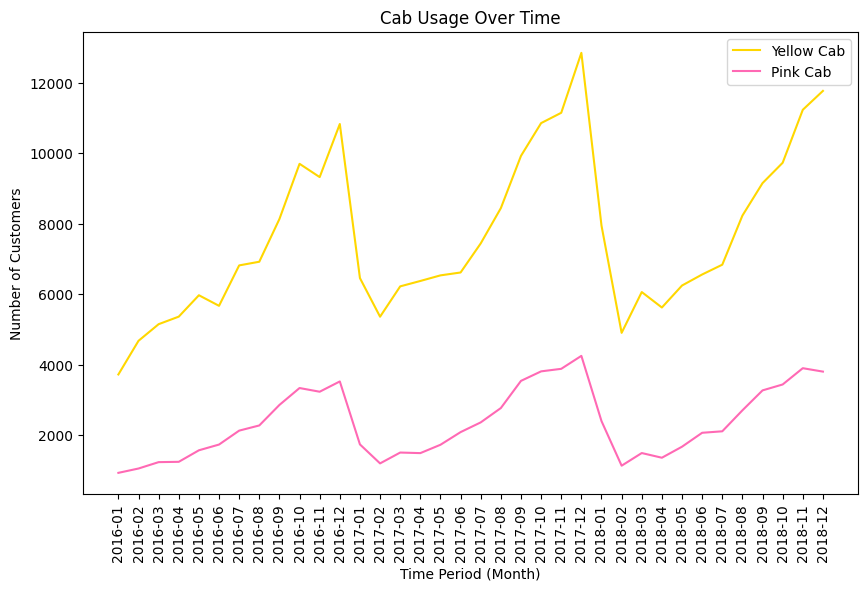

In [147]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'cab_data' with a 'Date of Travel' column

# Grouping the data by month and counting the number of customers for each cab company
monthly_usage_yellow = cab_data[cab_data['Company'] == 'Yellow Cab'].groupby(cab_data['Date of Travel'].dt.to_period('M')).size()
monthly_usage_pink = cab_data[cab_data['Company'] == 'Pink Cab'].groupby(cab_data['Date of Travel'].dt.to_period('M')).size()

# Convert Period objects to strings
monthly_usage_yellow.index = monthly_usage_yellow.index.astype(str)
monthly_usage_pink.index = monthly_usage_pink.index.astype(str)

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the line chart for Yellow Cab with yellow color
plt.plot(monthly_usage_yellow.index, monthly_usage_yellow.values, color='gold', label='Yellow Cab')
# Plotting the line chart for Pink Cab with pink color
plt.plot(monthly_usage_pink.index, monthly_usage_pink.values, color='hotpink', label='Pink Cab')

plt.xlabel('Time Period (Month)')
plt.ylabel('Number of Customers')
plt.title('Cab Usage Over Time')

# Rotate x-axis tick labels vertically
plt.xticks(rotation='vertical')

# Add legend
plt.legend()

plt.show()


### Hypothesis 2:

#### Are there are significant variations in the number of cab users across different cities?

#### Can we which cities have the highest and lowest number of cab users?

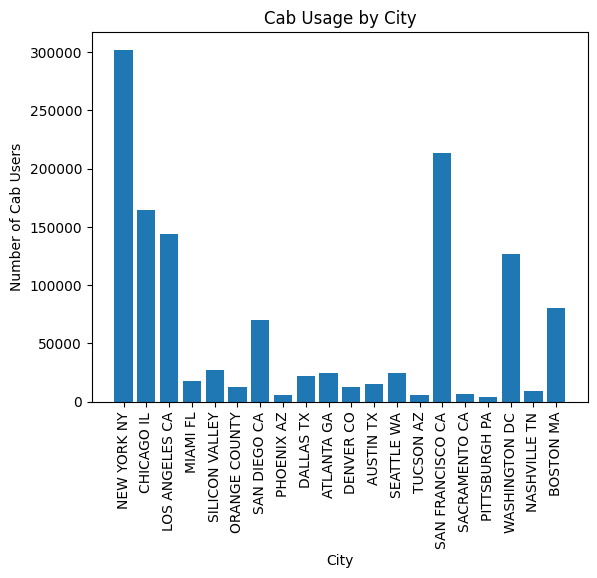

In [58]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'city_data' with 'City' and 'Users' columns
# city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)
# city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)

# Sorting the cities based on the number of users in descending order
city_data['Users']=city_data['Users'].astype(int)
city_data_sorted = city_data.sort_values('Users', ascending=False)
city_data_sorted.head(20)
city1=city_data['City']
user1=city_data['Users']
# Plotting the bar chart
plt.bar(city1, user1)
plt.xlabel('City')
plt.ylabel('Number of Cab Users')
plt.title('Cab Usage by City')
plt.xticks(rotation=90)
plt.show()


#### Now see how those numbers are distributes amoung the 2 companies

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'city_data' with 'City' and 'Users' columns
# Assuming you have a pandas DataFrame named 'company_data' with 'City' and 'Users' columns for each company

# Sorting the cities based on the number of users in descending order for each company
yellow_cab_data = final_data[final_data['Company'] == 'Yellow Cab'].sort_values('Users', ascending=False)
pink_cab_data = final_data[final_data['Company'] == 'Pink Cab'].sort_values('Users', ascending=False)

# Plotting the bar chart for each company
plt.bar(yellow_cab_data['City'], yellow_cab_data['Users'], color='gold', label='Yellow Cab')
plt.bar(pink_cab_data['City'], pink_cab_data['Users'], color='hotpink', label='Pink Cab')
plt.xlabel('City')
plt.ylabel('Number of Cab Users')
plt.title('Cab Usage by City')
plt.xticks(rotation=90)
plt.legend()
plt.show()



### Hypothesis 3:
#### Customer segments differ based on demographics.

#### Visualization ideas:

#### Create pie charts or bar charts to display the distribution of customers based on gender, age groups, or income brackets.
#### Use different colors or patterns to represent each category and visualize the proportion of customers in each segment.
#### Create stacked bar charts to compare customer segments across cab companies or payment modes.

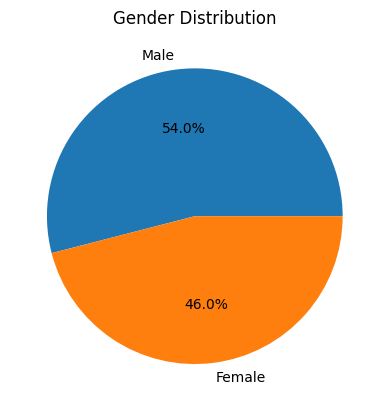

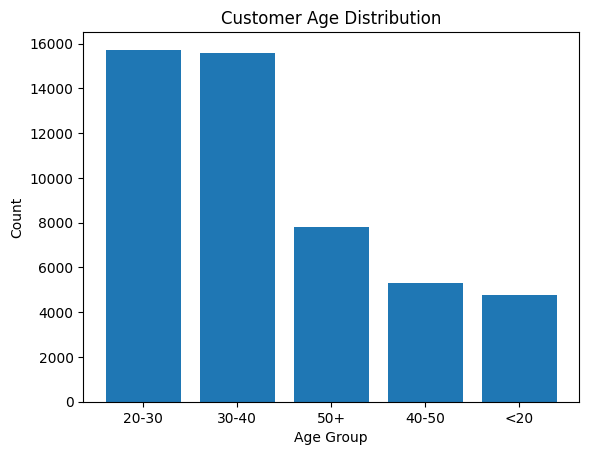

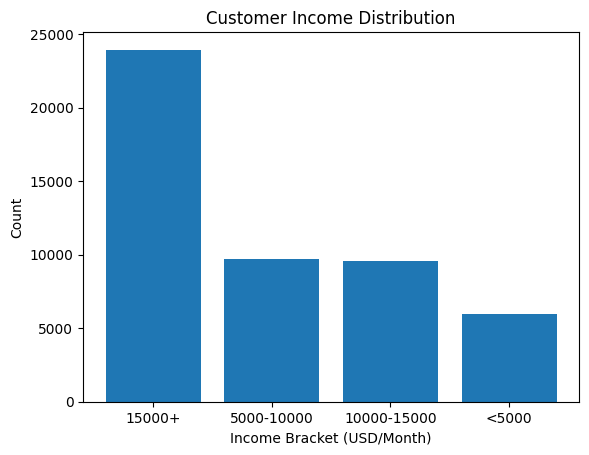

In [123]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'customer_data' with 'Gender', 'Age', and 'Income' columns

# Pie chart for gender distribution
gender_counts = customer_data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# Bar chart for age groups
age_groups = pd.cut(customer_data['Age'], bins=[0, 20, 30, 40, 50, float('inf')], labels=['<20', '20-30', '30-40', '40-50', '50+'])
age_group_counts = age_groups.value_counts()
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Customer Age Distribution')
plt.show()

# Bar chart for income brackets
income_brackets = pd.cut(customer_data['Income (USD/Month)'], bins=[0, 5000, 10000, 15000, float('inf')], labels=['<5000', '5000-10000', '10000-15000', '15000+'])
income_bracket_counts = income_brackets.value_counts()
plt.bar(income_bracket_counts.index, income_bracket_counts.values)
plt.xlabel('Income Bracket (USD/Month)')
plt.ylabel('Count')
plt.title('Customer Income Distribution')
plt.show()


<Figure size 1000x600 with 0 Axes>

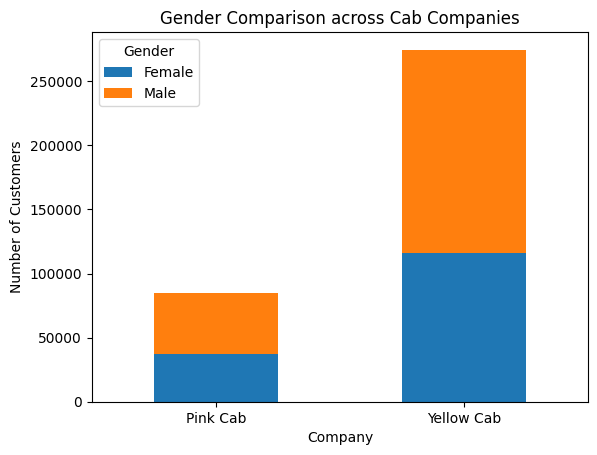

<Figure size 1000x600 with 0 Axes>

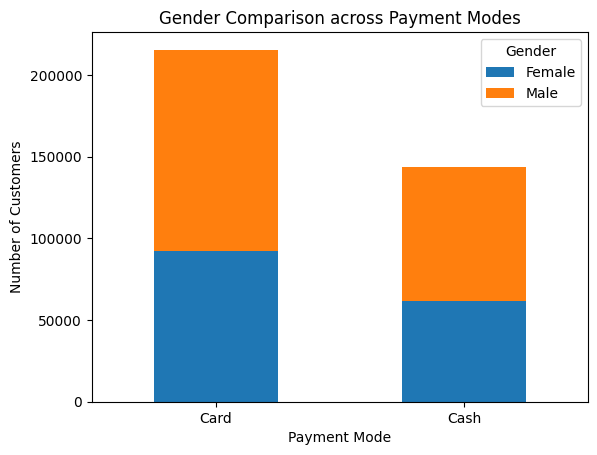

In [128]:

# Grouping the data by company and gender and counting the number of customers
company_gender_data = final_data.groupby(['Company', 'Gender']).size().unstack()

# Grouping the data by payment mode and gender and counting the number of customers
payment_gender_data = final_data.groupby(['Payment_Mode', 'Gender']).size().unstack()

# Set a smaller figure size
plt.figure(figsize=(10, 6))

# Plotting the stacked bar chart for comparing customer segments across cab companies
company_gender_data.plot(kind='bar', stacked=True)
plt.xlabel('Company')
plt.ylabel('Number of Customers')
plt.title('Gender Comparison across Cab Companies')
plt.xticks(rotation=0)
plt.legend(title='Gender')

plt.show()

# Set a smaller figure size
plt.figure(figsize=(10, 6))

# Plotting the stacked bar chart for comparing customer segments across payment modes
payment_gender_data.plot(kind='bar', stacked=True)
plt.xlabel('Payment Mode')
plt.ylabel('Number of Customers')
plt.title('Gender Comparison across Payment Modes')
plt.xticks(rotation=0)
plt.legend(title='Gender')

plt.show()



### Hypothesis 4:
#### Profitability differs between the two cab companies.

#### Create a grouped bar chart or a box plot comparing the profit margins of Pink Cab and the other cab company.
#### Use different colors to represent each cab company and compare their profit margins side by side.


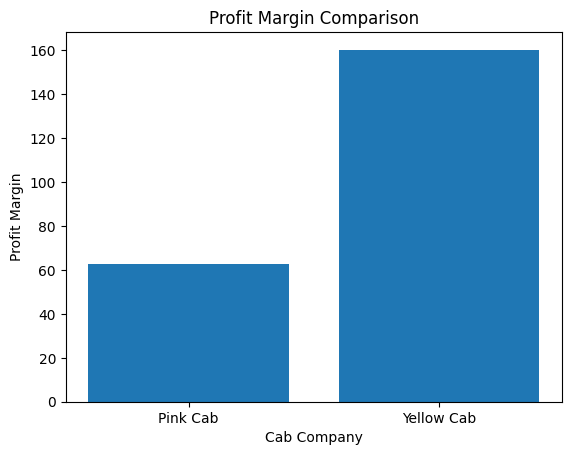

In [36]:
import matplotlib.pyplot as plt

profit_margin = (cab_data['Price Charged'] - cab_data['Cost of Trip']).groupby(cab_data['Company']).mean()

# Define colors for the bars
colors = ['hotpink', 'gold']

# Plotting the bar chart with customized colors
plt.bar(profit_margin.index, profit_margin.values)
plt.xlabel('Cab Company')
plt.ylabel('Profit Margin')
plt.title('Profit Margin Comparison')
plt.show()


#### Display additional statistics such as mean, median, or quartiles to highlight the differences in profitability.

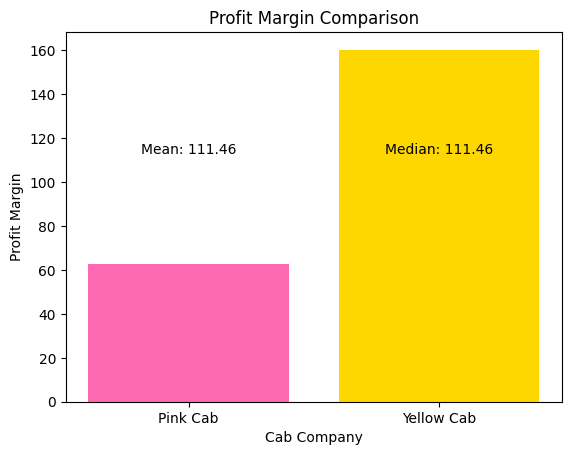

In [5]:
import numpy as np

profit_margin = (cab_data['Price Charged'] - cab_data['Cost of Trip']).groupby(cab_data['Company']).mean()

# Compute additional statistics
mean_profit = profit_margin.mean()
median_profit = profit_margin.median()
q1_profit = np.percentile(profit_margin, 25)
q3_profit = np.percentile(profit_margin, 75)

# Plotting the bar chart with statistics annotations
plt.bar(profit_margin.index, profit_margin.values, color=colors)
plt.xlabel('Cab Company')
plt.ylabel('Profit Margin')
plt.title('Profit Margin Comparison')

# Add statistics annotations
plt.text(0, mean_profit, f'Mean: {mean_profit:.2f}', ha='center', va='bottom')
plt.text(1, median_profit, f'Median: {median_profit:.2f}', ha='center', va='bottom')
# plt.text(2, q1_profit, f'Q1: {q1_profit:.2f}', ha='center', va='bottom')
# plt.text(3, q3_profit, f'Q3: {q3_profit:.2f}', ha='center', va='bottom')

plt.show()


### Hypothesis 5: 
####
####

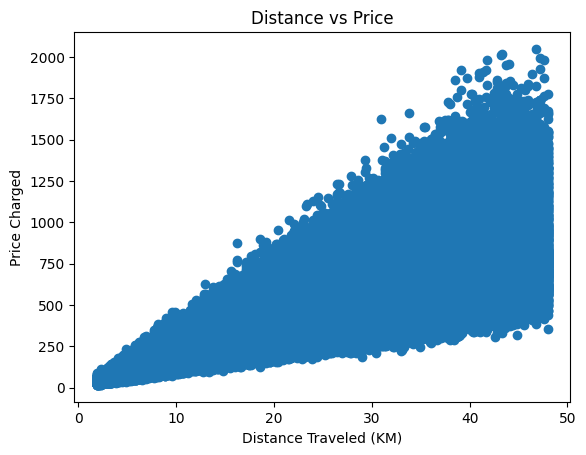

In [141]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'cab_data' with 'KM Travelled' and 'Price Charged' columns

# Creating a scatter plot
plt.scatter(cab_data['KM Travelled'], cab_data['Price Charged'])
plt.xlabel('Distance Traveled (KM)')
plt.ylabel('Price Charged')
plt.title('Distance vs Price')
plt.show()


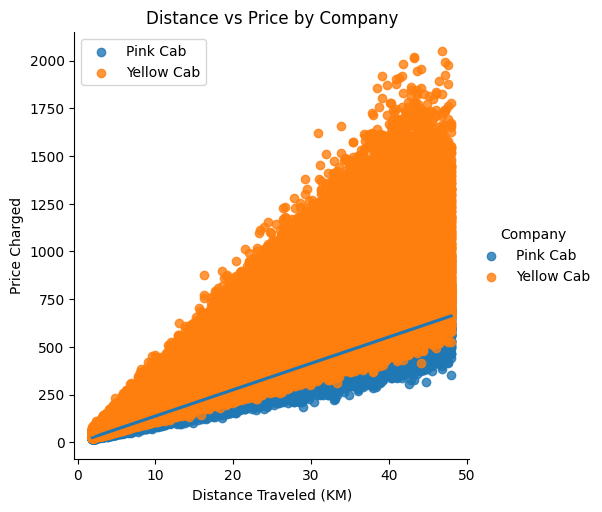

In [145]:
import seaborn as sns

sns.lmplot(x='KM Travelled', y='Price Charged', data=cab_data, hue='Company', scatter=True)
plt.xlabel('Distance Traveled (KM)')
plt.ylabel('Price Charged')
plt.title('Distance vs Price by Company')
plt.legend()
plt.show()




### Hypotheisis 6:
#### Create a grouped bar chart or a stacked bar chart showing the count or proportion of different payment modes for each city.
#### Each bar represents a city, and the different payment modes are stacked or grouped within each bar.
#### Use different colors to represent each payment mode and compare their preferences across cities.

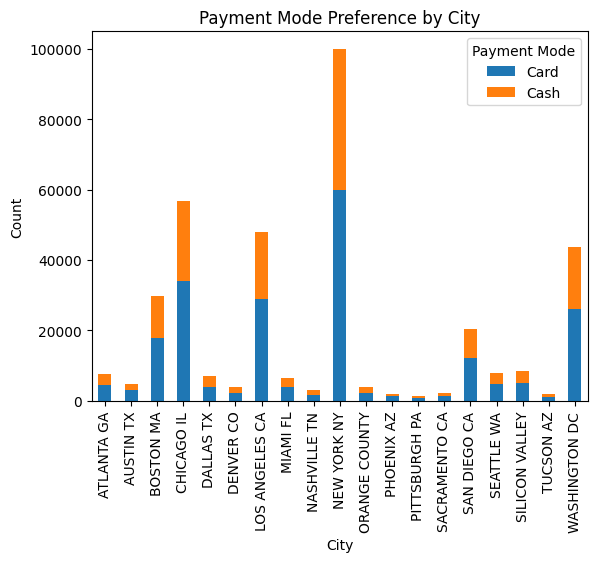

In [135]:
import matplotlib.pyplot as plt

# Assuming you have pandas DataFrames named 'city_data' and 'transaction_data' with 'City', 'Payment_Mode', and 'Transaction_ID' columns

# Merging the city_data and transaction_data DataFrames on the 'City' column
# city_merged_data = city_data.merge(transaction_data, on='City')

# Counting the number of payment modes for each city
payment_mode_counts = final_data.groupby(['City', 'Payment_Mode'])['Transaction ID'].count().unstack()

# Creating a stacked bar chart
payment_mode_counts.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Payment Mode Preference by City')
plt.xticks(rotation=90)
plt.legend(title='Payment Mode')
plt.show()


### Hypotheisis 7:
### Analyse the Profits  

/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_83009/2681369522.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()


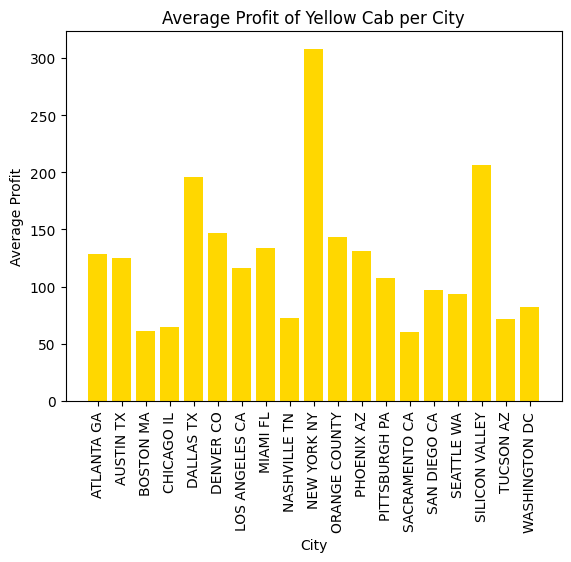

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'cab_data' with the given data

# Filter the data for Yellow Cab company
yellow_cab_data = cab_data[cab_data['Company'] == 'Yellow Cab']

# Calculate the average profit per city for Yellow Cab
average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()
average_profit_yellow_cab['Profit'] = average_profit_yellow_cab['Price Charged'] - average_profit_yellow_cab['Cost of Trip']

# Reset the index for easier plotting
average_profit_yellow_cab = average_profit_yellow_cab.reset_index()

# Plotting the bar chart
plt.bar(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['Profit'], color='gold')
plt.xlabel('City')
plt.ylabel('Average Profit')
plt.title('Average Profit of Yellow Cab per City')
plt.xticks(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['City'], rotation=90)
plt.show()



/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_83009/618436962.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()


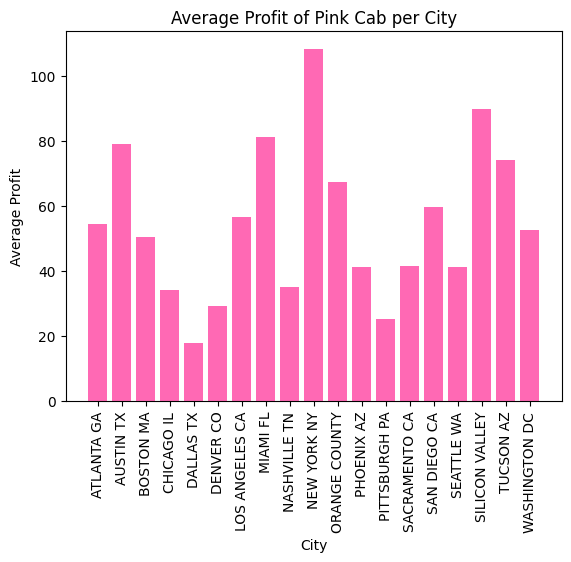

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'cab_data' with the given data

# Filter the data for Yellow Cab company
yellow_cab_data = cab_data[cab_data['Company'] == 'Pink Cab']

# Calculate the average profit per city for Yellow Cab
average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()
average_profit_yellow_cab['Profit'] = average_profit_yellow_cab['Price Charged'] - average_profit_yellow_cab['Cost of Trip']

# Reset the index for easier plotting
average_profit_yellow_cab = average_profit_yellow_cab.reset_index()

# Plotting the bar chart
plt.bar(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['Profit'], color='hotpink')
plt.xlabel('City')
plt.ylabel('Average Profit')
plt.title('Average Profit of Pink Cab per City')
plt.xticks(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['City'], rotation=90)
plt.show()


/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_83009/1207669783.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()
/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_83009/1207669783.py:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_profit_pink_cab = pink_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()


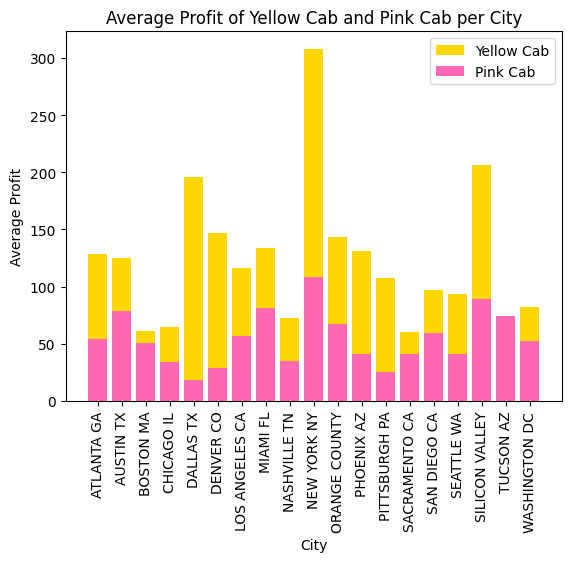

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'cab_data' with the given data

# Filter the data for Yellow Cab company
yellow_cab_data = cab_data[cab_data['Company'] == 'Yellow Cab']

# Calculate the average profit per city for Yellow Cab
average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()
average_profit_yellow_cab['Profit'] = average_profit_yellow_cab['Price Charged'] - average_profit_yellow_cab['Cost of Trip']

# Reset the index for easier plotting
average_profit_yellow_cab = average_profit_yellow_cab.reset_index()

# Filter the data for Pink Cab company
pink_cab_data = cab_data[cab_data['Company'] == 'Pink Cab']

# Calculate the average profit per city for Pink Cab
average_profit_pink_cab = pink_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()
average_profit_pink_cab['Profit'] = average_profit_pink_cab['Price Charged'] - average_profit_pink_cab['Cost of Trip']

# Reset the index for easier plotting
average_profit_pink_cab = average_profit_pink_cab.reset_index()

# Plotting the bar chart
plt.bar(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['Profit'], color='gold', label='Yellow Cab')
plt.bar(range(len(average_profit_pink_cab)), average_profit_pink_cab['Profit'], color='hotpink', label='Pink Cab')
plt.xlabel('City')
plt.ylabel('Average Profit')
plt.title('Average Profit of Yellow Cab and Pink Cab per City')
plt.xticks(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['City'], rotation=90)
plt.legend()
plt.show()
